In [79]:
import pandas as pd
import numpy as np

In [80]:
df = pd.read_excel("Bike_Sharing(extra).xlsx")
print(f'This dataset has {df.shape[0]} rows and {df.shape[1]} columns.')
df.head()

This dataset has 17544 rows and 22 columns.


,S_No,index,Time,Date,Date2,season,yr,mnth,day,hr,...,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total,https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset
0,1,1.0,2011-01-01 00:00:00,2011-01-01,1,1,0,1,1,0,...,0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0,NaN
1,2,2.0,2011-01-01 01:00:00,2011-01-01,1,1,0,1,1,1,...,0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0,NaN
2,3,3.0,2011-01-01 02:00:00,2011-01-01,1,1,0,1,1,2,...,0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0,NaN
3,4,4.0,2011-01-01 03:00:00,2011-01-01,1,1,0,1,1,3,...,0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0,NaN
4,5,5.0,2011-01-01 04:00:00,2011-01-01,1,1,0,1,1,4,...,0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0,NaN


### Data Exploration

In [81]:
print('Column Data Types:')
print(df.dtypes)

print('\nNumber of Unique Values per Column:')
print(df.nunique())

print('\nColumns with NA Values:')
nas = df.isnull().sum(axis = 0)
print(nas[nas>0])

Column Data Types:
S_No                                                                     int64
index                                                                  float64
Time                                                            datetime64[ns]
Date                                                            datetime64[ns]
Date2                                                                    int64
season                                                                   int64
yr                                                                       int64
mnth                                                                     int64
day                                                                      int64
hr                                                                       int64
holiday                                                                  int64
weekday                                                                  int64
workingday                       

### Data Cleaning - Dropping of Redundant Columns

Redundant columns such as **S_No**, **index** and the weblink were dropped.

In [82]:
df = df.drop(columns = ['S_No', 'index', 'https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset'])

### Data Cleaning - Handling Missing Values

The columns **Date**, **weathersit**, **temp**, **atemp**, **hum**, **windspeed**, **casual**, **registered**, and **total** had 165 rows that had missing values.

For **Date**, it was filled in with the date in the **Time** column.

For **weathersit**, **temp**, **atemp**, **hum**, **windspeed**, **casual**, **registered**, and **total**, we input the average value found after grouping the dataframe according to **weekday**, **hr**, and **season**. For the weather related variables such as **weathersit**, **temp**, **atemp**, **hum**, and **windspeed**, the **season** and **hr** should provide a fair representation of the mean values. For **casual**, **registered**, and **total**, the **hr** and **weekday** should provide a fair representation.

Lastly

In [83]:
df_grouped = df.groupby(['weekday', 'hr', 'season']).mean()
df_grouped.head()

Date2        yr       mnth        day  holiday  \
weekday hr season                                                        
0       0  1       264.888889  0.518519   2.962963  16.037037      0.0   
           2       310.000000  0.500000   4.730769  14.923077      0.0   
           3       401.000000  0.500000   7.692308  15.461538      0.0   
           4       492.000000  0.500000  10.653846  15.846154      0.0   
        1  1       264.888889  0.518519   2.962963  16.037037      0.0   

                   workingday  weathersit      temp     atemp       hum  \
weekday hr season                                                         
0       0  1              0.0    1.296296  0.268889  0.265430  0.591481   
           2              0.0    1.500000  0.510000  0.488350  0.698846   
           3              0.0    1.280000  0.668800  0.625464  0.720000   
           4              0.0    1.384615  0.373846  0.376454  0.696154   
        1  1              0.0    1.370370  0.260741  0.254774  0.603333   

                   windspeed     casual  registered       total  
weekday hr season                                                
0       0  1        0.239367   5.888889   41.851852   47.740741  
           2        0.157873  21.269231   76.615385   97.884615  
           3        0.143288  29.800000  100.520000  130.320000  
           4        0.136054  16.884615   86.307692  103.192308  
        1  1        0.243222   5.777778   36.629630   42.407407

In [84]:
df['Date'] = df['Date'].fillna(pd.to_datetime(df['Time'].astype(str).str[:11]))
df = df.set_index(['weekday', 'hr', 'season'])
df = df.sort_index(ascending = True)
df = df.fillna(df_grouped)

df['casual'] = df['casual'].round(0).astype(int)
df['registered'] = df['registered'].round(0).astype(int)
df['weathersit'] = df['weathersit'].round(0).astype(int)
df['total'] = (df['casual'] + df['registered']).astype(int)

df = df.sort_values(by = 'Time', ascending = True)
df = df.reset_index()
df = df.set_index(['Time'])

print('\nColumns with NA Values:')
nas = df.isnull().sum(axis = 0)
print(nas[nas>0])

df.head()


Columns with NA Values:
Series([], dtype: int64)


,weekday,hr,season,Date,Date2,yr,mnth,day,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
Time,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,6,0,1,2011-01-01,1,0,1,1,0,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01 01:00:00,6,1,1,2011-01-01,1,0,1,1,0,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01 02:00:00,6,2,1,2011-01-01,1,0,1,1,0,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01 03:00:00,6,3,1,2011-01-01,1,0,1,1,0,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01 04:00:00,6,4,1,2011-01-01,1,0,1,1,0,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Model 1 (OLS)

Using OLS to predict total users.

In [407]:
df1 = df.copy()

# Drop unneccesary columns
df1 = df1.drop(columns=['Date', 'Date2', 'registered', 'casual'])

# Move target variable to position 0:
y = "total"
colname = list(df1)
colname.insert(0, colname.pop(colname.index(y)))
df1 = df1[colname]

# Uncomment this if you want to 'unnormalize' the columns (might allow for easier interpretation if you unnormalize)
df1['temp'] = df1['temp'] * 41
df1['atemp'] = df1['atemp'] * 50
df1['hum'] = df1['hum'] * 100
df1['windspeed'] = df1['windspeed'] * 67

df1.head()

,total,weekday,hr,season,yr,mnth,day,holiday,workingday,weathersit,temp,atemp,hum,windspeed
Time,,,,,,,,,,,,,,
2011-01-01 00:00:00,16,6,0,1,0,1,1,0,0,1,9.84,14.395,81.0,0.0
2011-01-01 01:00:00,40,6,1,1,0,1,1,0,0,1,9.02,13.635,80.0,0.0
2011-01-01 02:00:00,32,6,2,1,0,1,1,0,0,1,9.02,13.635,80.0,0.0
2011-01-01 03:00:00,13,6,3,1,0,1,1,0,0,1,9.84,14.395,75.0,0.0
2011-01-01 04:00:00,1,6,4,1,0,1,1,0,0,1,9.84,14.395,75.0,0.0


#### Step 1: Remove Collinear X Variables

In [408]:
## function to delete collinear X's
def delcorr(df, y=''):
    if y == '': #assume 1st column is y
        y = df.columns[0]
    corv = df.drop(y, axis=1).corrwith(df[y]).rename(y).sort_values(key=abs).to_frame() #corr(Xs, y) ranked
    delta = 0.05 #corr difference lower limit
    dl2 = []
    icorr = True
    while icorr:
        a = abs(corv).diff() <= delta #adjacent rows with similar abs(corr(Xs, y))
        colname = list(df)[1:]
        dl = []
        print('\nX pairs with correlations >', 1 - delta, ':')
        for b in range(1, a.shape[0]):
            if a.iloc[b, 0]:
                if abs(df[a.index[b - 1]].corr(df[a.index[b]])) > 1 - delta:
                    dv0 = a.index[b - 1]
                    dv1 = a.index[b]
                    #neither should already be deleted:
                    if not (dv0 in dl) and not (dv1 in dl):
                        #delete x with rather lower corr(x, y):
                        if abs(corv.loc[dv0, y]) - abs(corv.loc[dv1, y]) >= delta:
                            d = dv1
                        elif len(dv0) < len(dv1): #delete x with longer name:
                            d = dv1
                        else:
                            d = dv0
                        dl.append(d) #for en masse deletion later
                        corv.drop([d], axis=0, inplace=True) #delete from column of corr with y
                        print(dv0, ',', dv1)
        if len(dl) > 0:
            df.drop(axis=1, columns=dl, inplace=True) #variables deleted en masse
            dl2 = dl2 + dl #keep for real deletion later
            print('\n' + str(len(dl)), 'variables considered for deletion:')
            print('\n'.join([str(x) for x in dl]))
        else:
            print('(no more)')
            icorr = False
    return dl2

delcorr(df1)


X pairs with correlations > 0.95 :
atemp , temp

1 variables considered for deletion:
atemp

X pairs with correlations > 0.95 :
(no more)


['atemp']

#### Step 2: Create Dummy Variables for Categorical Variables

In [409]:
df1 = pd.get_dummies(df1, columns = ['season', 'yr', 'mnth', 'day', 'hr', 'weekday', 'weathersit'], drop_first=True)
df1.head()

,total,holiday,workingday,temp,hum,windspeed,season_2,season_3,season_4,yr_1,...,hr_23,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,weathersit_4
Time,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,16,0,0,9.84,81.0,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2011-01-01 01:00:00,40,0,0,9.02,80.0,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2011-01-01 02:00:00,32,0,0,9.02,80.0,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2011-01-01 03:00:00,13,0,0,9.84,75.0,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2011-01-01 04:00:00,1,0,0,9.84,75.0,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### Step 3: Transform Numerical Variables and Remove Collinear X Variables

In [410]:
to_trf = ['temp', 'hum', 'windspeed']

for vrb in to_trf:
    df1[vrb + '_sq'] = df1[vrb] ** 2
    df1[vrb + '_sqrt'] = np.sqrt(df1[vrb])
    
delcorr(df1)


X pairs with correlations > 0.95 :
hum , hum_sq
temp_sq , temp_sqrt

2 variables considered for deletion:
hum_sq
temp_sqrt

X pairs with correlations > 0.95 :
temp_sq , temp

1 variables considered for deletion:
temp_sq

X pairs with correlations > 0.95 :
(no more)


['hum_sq', 'temp_sqrt', 'temp_sq']

#### Step 4: Perform Train-Test Split

In [411]:
import random
from sklearn.model_selection import train_test_split
# random.seed()
# rd = random.getstate()[1][1]
# print(rd)

X_train, X_test, y_train, y_test = train_test_split(df1, df1['total'], test_size=0.3, random_state=123456)

df1 = X_train
dftest = X_test

#### Step 5: Perform Feature Selection

Backwards feature selection on the training dataset  was conducting by first reducing F-stat p-value and subsequently BIC. BIC was used instead of Adjusted R-Squared as it will result in a 'tighter' model, with less X variables in the final model, with minimal change in the Adjusted R-Squared.

In [412]:
import statsmodels.formula.api as smf
import statsmodels as sm
import statsmodels.api as sma
import warnings
warnings.filterwarnings('ignore')


# Feature Selection
df0 = df1.copy()
modeleq = ' + '.join(list(df1)).replace('+', '~', 1)

final_eq1 = modeleq
minfpv = np.inf
minbic = np.inf
maxadjR2 = -minfpv
numx = df1.shape[1] - 1
print(f'Commencing OLS Variable Selection. Initial number of X Variables: {numx}.')

while True:
    output = smf.ols(modeleq, df1).fit()
    fpv = output.f_pvalue
    adjR2 = output.rsquared_adj
    bic = output.bic
    ##print(f'Model has F-stat p-value of {fpv}, Adjusted R-squared of {adjR2}, and BIC of {bic}')
    
    if fpv < minfpv:
        minfpv = fpv
        maxadjR2 = adjR2
        minbic = bic
        final_eq1 = modeleq
    elif fpv == 0.0:
        if bic < minbic:
            minfpv = fpv
            maxadjR2 = adjR2
            minbic = bic
            final_eq1 = modeleq
    
    prf = sma.stats.anova_lm(output, typ=2).iloc[:-1, :].sort_values(['F']).sort_values(['df'], ascending=False)['PR(>F)']
    maxp = max(prf)
    xdrop = prf[maxp == prf].axes[0][0]  # 1st element of row-label .axes[0]
    numx -= 1
    ##print(f'\nVariable dropped: {xdrop} with a p-value of {prf[xdrop]}.')
    ##print(f'Number of Xs remaining: {numx}.')

    if (modeleq.find('~ ' + xdrop + ' + ') != -1): # xdrop is first X
        modeleq = modeleq.replace('~ ' + xdrop + ' + ', '~ ')
    elif (modeleq.find('+ ' + xdrop + ' + ') != -1):
        modeleq = modeleq.replace('+ ' + xdrop + ' + ', '+ ')
    else: # xdrop is last X
        modeleq = modeleq[:-len(xdrop) - 3]        
    if numx == 1:
        ##print('Variable left:', modeleq[modeleq.find('~') + 2 :])
        break

## Displays final regression model
Xs = final_eq1.count('+') + 1
model = smf.ols(final_eq1, data=df0)
result = model.fit()

print(f'\nFinal Number of X Variables: {Xs} Xs\n')
print(f'Final Model Equation:\n{final_eq1}\n')
print(result.summary2())

Commencing OLS Variable Selection. Initial number of X Variables: 85.

Final Number of X Variables: 37 Xs

Final Model Equation:
total ~ workingday + temp + hum + season_2 + season_3 + season_4 + yr_1 + mnth_3 + mnth_5 + mnth_7 + mnth_9 + mnth_10 + hr_3 + hr_4 + hr_6 + hr_7 + hr_8 + hr_9 + hr_10 + hr_11 + hr_12 + hr_13 + hr_14 + hr_15 + hr_16 + hr_17 + hr_18 + hr_19 + hr_20 + hr_21 + hr_22 + hr_23 + weekday_6 + weathersit_2 + weathersit_3 + hum_sqrt + windspeed_sq

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.684      
Dependent Variable: total            AIC:                148458.9520
Date:               2022-04-15 22:35 BIC:                148740.7496
No. Observations:   12280            Log-Likelihood:     -74191.    
Df Model:           37               F-statistic:        718.1      
Df Residuals:       12242            Prob (F-statistic): 0.00       
R-squared:          0.685            Scale:              10389.   

#### Step 6: Perform Variable Interaction for Untransformed X Variables Remaining After Feature Selection, and Remove Collinear X Variables

In [413]:
vrbs = final_eq1.replace('~', '+').split(' + ')
dfint = df1[vrbs]

to_int = []
int_with = []
for vrb in vrbs[1:]:
    if dfint[vrb].nunique() > 2 and 'sq' not in vrb:
        to_int.append(vrb)
    elif dfint[vrb].nunique() <= 2 and 'sq' not in vrb:
        int_with.append(vrb)
    
for var_a in to_int:
    for var_b in int_with:
        new_var = var_a + "_x_" + var_b
        dfint[new_var] = dfint[var_a] * dfint[var_b]
        dftest[new_var] = dftest[var_a] * dftest[var_b]
        
## Delete collinear X's
delcorr(dfint)


X pairs with correlations > 0.95 :
hr_7 , hum_x_hr_7
hum_x_hr_23 , hr_23
hum_x_hr_6 , hr_6
hum_x_hr_8 , hr_8
hum_x_hr_3 , hr_3
hum_x_hr_4 , hr_4

6 variables considered for deletion:
hum_x_hr_7
hum_x_hr_23
hum_x_hr_6
hum_x_hr_8
hum_x_hr_3
hum_x_hr_4

X pairs with correlations > 0.95 :
(no more)


['hum_x_hr_7',
 'hum_x_hr_23',
 'hum_x_hr_6',
 'hum_x_hr_8',
 'hum_x_hr_3',
 'hum_x_hr_4']

#### Step 7: Perform Feature Selection to Arrive at Final Model and Reduced Model

In [414]:
warnings.filterwarnings('ignore')

# Feature Selection
df0 = dfint.copy()
modeleq = ' + '.join(list(dfint)).replace('+', '~', 1)

final_eq = modeleq
final_eq_small = ""
targetXs = 20 ## input the desired number of X variables for the reduced model
minfpv = np.inf
minbic = np.inf
maxadjR2_small = -np.inf
numx = dfint.shape[1] - 1
print(f'Commencing OLS Variable Selection. Initial number of X Variables: {numx}.')
while True:
    output = smf.ols(modeleq, dfint).fit()
    fpv = output.f_pvalue
    bic = output.bic
    adjR2 = output.rsquared_adj
    ##print(f'Model has F-stat p-value of {fpv}, Adjusted R-squared of {adjR2}, and BIC of {bic}')
    
    if fpv < minfpv:
        minfpv = fpv
        minbic = bic
        final_eq = modeleq
    elif fpv == 0.0:
        if bic < minbic:
            minfpv = fpv
            minbic = bic
            final_eq = modeleq
        if adjR2 > maxadjR2_small and numx <= targetXs:
            maxadjR2_small = adjR2
            final_eq_small = modeleq
    
    prf = sma.stats.anova_lm(output, typ=2).iloc[:-1, :].sort_values(['F']).sort_values(['df'], ascending=False)['PR(>F)']
    maxp = max(prf)
    xdrop = prf[maxp == prf].axes[0][0]  # 1st element of row-label .axes[0]
    numx -= 1
    ##print(f'\nVariable dropped: {xdrop} with a p-value of {prf[xdrop]}.')
    ##print(f'Number of Xs remaining: {numx}.')
    
    if (modeleq.find('~ ' + xdrop + ' + ') != -1): # xdrop is first X
        modeleq = modeleq.replace('~ ' + xdrop + ' + ', '~ ')
    elif (modeleq.find('+ ' + xdrop + ' + ') != -1):
        modeleq = modeleq.replace('+ ' + xdrop + ' + ', '+ ')
    else: # xdrop is last X
        modeleq = modeleq[:-len(xdrop) - 3]        
    if numx == 1:
        ##print('Variable left:', modeleq[modeleq.find('~') + 2 :])
        break

## Displays final regression model
Xs = final_eq.count('+') + 1
model = smf.ols(final_eq, data=df0)
result = model.fit()

print(f'\nFinal Number of X Variables: {Xs} Xs\n')
print(f"Final Model Equation with {Xs} X's:\n{final_eq}\n")
print(result.summary2())

model_small = smf.ols(final_eq_small, data=df0)
result2 = model_small.fit()
print(f"\nFinal Model Equation with {targetXs} X's:\n{final_eq_small}\n")
print(result2.summary2())

Commencing OLS Variable Selection. Initial number of X Variables: 97.

Final Number of X Variables: 60 Xs

Final Model Equation with 60 X's:
total ~ season_2 + season_3 + season_4 + yr_1 + mnth_3 + mnth_5 + mnth_7 + mnth_10 + hr_7 + hr_8 + hr_9 + hr_10 + hr_11 + hr_12 + hr_13 + hr_14 + hr_15 + hr_16 + hr_17 + hr_18 + weekday_6 + weathersit_2 + windspeed_sq + temp_x_workingday + temp_x_season_3 + temp_x_season_4 + temp_x_yr_1 + temp_x_mnth_3 + temp_x_mnth_7 + temp_x_mnth_9 + temp_x_hr_3 + temp_x_hr_4 + temp_x_hr_6 + temp_x_hr_7 + temp_x_hr_8 + temp_x_hr_9 + temp_x_hr_10 + temp_x_hr_11 + temp_x_hr_12 + temp_x_hr_13 + temp_x_hr_14 + temp_x_hr_15 + temp_x_hr_16 + temp_x_hr_17 + temp_x_hr_18 + temp_x_hr_19 + temp_x_hr_20 + temp_x_hr_21 + temp_x_hr_22 + temp_x_hr_23 + hum_x_workingday + hum_x_season_2 + hum_x_season_3 + hum_x_season_4 + hum_x_yr_1 + hum_x_mnth_9 + hum_x_mnth_10 + hum_x_hr_17 + hum_x_hr_18 + hum_x_weathersit_3

                   Results: Ordinary least squares
Model:        

### Validation of Full Model

The full model was applied on the testing dataset.

In [415]:
import matplotlib.pyplot as plt

def YvsX(x, y):
    #plot y vs x   
    plt.figure(figsize=(9, 9))
    plt.plot(x, y, 'o', markersize=3, alpha = 0.3)

    a, b = min(x), max(x)
    s, i = np.polyfit(x, y, 1) #s=slope, i=intercept; for best-fit 1-degree polynomial
    
    #plot 2 points & join with red line; this fake line is not part of regression
    plt.plot([a, b], i + [s * a, s * b], 'r', linewidth=1)

    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.title(y.name + ' vs ' + x.name)
    plt.grid()
    plt.show()

Final Model Equation with 60 X's:
total ~ season_2 + season_3 + season_4 + yr_1 + mnth_3 + mnth_5 + mnth_7 + mnth_10 + hr_7 + hr_8 + hr_9 + hr_10 + hr_11 + hr_12 + hr_13 + hr_14 + hr_15 + hr_16 + hr_17 + hr_18 + weekday_6 + weathersit_2 + windspeed_sq + temp_x_workingday + temp_x_season_3 + temp_x_season_4 + temp_x_yr_1 + temp_x_mnth_3 + temp_x_mnth_7 + temp_x_mnth_9 + temp_x_hr_3 + temp_x_hr_4 + temp_x_hr_6 + temp_x_hr_7 + temp_x_hr_8 + temp_x_hr_9 + temp_x_hr_10 + temp_x_hr_11 + temp_x_hr_12 + temp_x_hr_13 + temp_x_hr_14 + temp_x_hr_15 + temp_x_hr_16 + temp_x_hr_17 + temp_x_hr_18 + temp_x_hr_19 + temp_x_hr_20 + temp_x_hr_21 + temp_x_hr_22 + temp_x_hr_23 + hum_x_workingday + hum_x_season_2 + hum_x_season_3 + hum_x_season_4 + hum_x_yr_1 + hum_x_mnth_9 + hum_x_mnth_10 + hum_x_hr_17 + hum_x_hr_18 + hum_x_weathersit_3



Time
2012-08-23 09:00:00    302.249998
2011-05-03 15:00:00    208.078752
2011-12-08 20:00:00    135.635380
2011-01-30 02:00:00    -48.323067
2012-04-08 17:00:00    663.735856
                          ...    
2011-12-23 23:00:00     29.409332
2012-10-15 20:00:00    288.113925
2011-01-26 13:00:00     76.239907
2011-07-04 13:00:00    240.371568
2011-12-03 22:00:00     75.729790
Length: 5264, dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     268.2
Date:                Fri, 15 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:36:52   Log-Likelihood:                -31133.
No. Observations:                5264   AIC:                         6.239e+04
Df Residuals:                    5203   BIC:                         6.279e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -48.3231      4

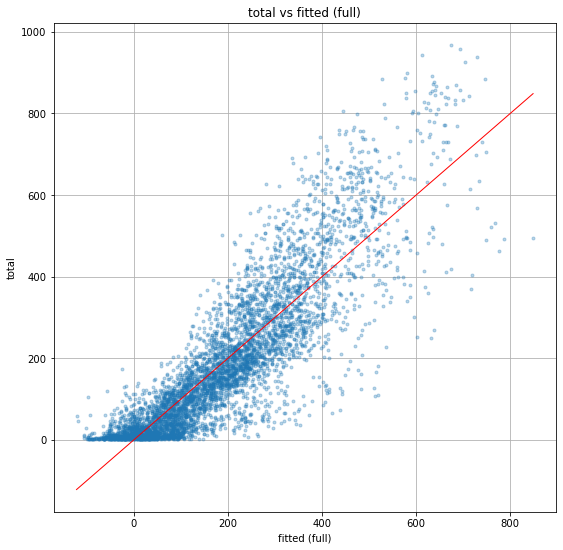

In [416]:
print(f"Final Model Equation with {Xs} X's:\n{final_eq}\n")

valid_full = smf.ols(final_eq, data=dftest).fit()
display(valid_full.fittedvalues)
print(valid_full.summary())

y = dftest['total']
yhat = valid_full.fittedvalues.rename('fitted (full)')
YvsX(yhat, y)

### Validation of Reduced Model

The reduced model was applied on the testing dataset.

Final Model Equation with 20 X's:
total ~ season_4 + yr_1 + temp_x_season_3 + temp_x_hr_7 + temp_x_hr_8 + temp_x_hr_9 + temp_x_hr_10 + temp_x_hr_11 + temp_x_hr_12 + temp_x_hr_13 + temp_x_hr_14 + temp_x_hr_15 + temp_x_hr_16 + temp_x_hr_17 + temp_x_hr_18 + temp_x_hr_19 + temp_x_hr_20 + temp_x_hr_21 + temp_x_hr_22 + hum_x_weathersit_3

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     599.3
Date:                Fri, 15 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:36:56   Log-Likelihood:                -31711.
No. Observations:                5264   AIC:                         6.346e+04
Df Residuals:                    5243   BIC:                         6.360e+04
Df Model:                        

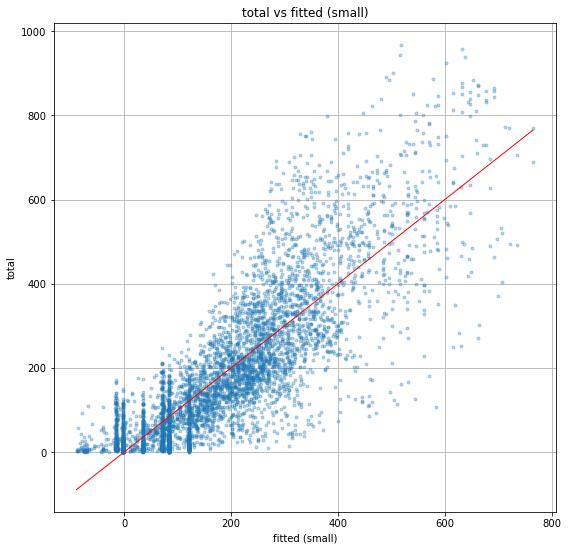

In [417]:
print(f"Final Model Equation with {targetXs} X's:\n{final_eq_small}\n")

valid_small = smf.ols(final_eq_small, data=dftest).fit()
print(valid_small.summary())

y = dftest['total']
yhat = valid_small.fittedvalues.rename('fitted (small)')
YvsX(yhat, y)

## Model 2 - Poisson Regression

In [332]:
df2 = df.copy()

# Drop unneccesary columns
df2 = df2.drop(columns=['Date', 'Date2', 'registered', 'total', 'day', 'mnth', 'yr'])

# Move target variable to position 0:
y = "casual"
colname = list(df2)
colname.insert(0, colname.pop(colname.index(y)))
df2 = df2[colname]

df2.head()

,casual,weekday,hr,season,holiday,workingday,weathersit,temp,atemp,hum,windspeed
Time,,,,,,,,,,,
2011-01-01 00:00:00,3,6,0,1,0,0,1,0.24,0.2879,0.81,0.0
2011-01-01 01:00:00,8,6,1,1,0,0,1,0.22,0.2727,0.80,0.0
2011-01-01 02:00:00,5,6,2,1,0,0,1,0.22,0.2727,0.80,0.0
2011-01-01 03:00:00,3,6,3,1,0,0,1,0.24,0.2879,0.75,0.0
2011-01-01 04:00:00,0,6,4,1,0,0,1,0.24,0.2879,0.75,0.0


#### Step 1: Remove Collinear X Variables

In [333]:
delcorr(df2)


X pairs with correlations > 0.95 :
atemp , temp

1 variables considered for deletion:
atemp

X pairs with correlations > 0.95 :
(no more)


['atemp']

#### Step 2: Create Dummy Variables for Categorical Variables

In [334]:
df2 = pd.get_dummies(df2, columns = ['season', 'weathersit', 'weekday', 'hr'], drop_first=True)
df2.head()

,casual,holiday,workingday,temp,hum,windspeed,season_2,season_3,season_4,weathersit_2,...,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
Time,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,3,0,0,0.24,0.81,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,8,0,0,0.22,0.80,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 02:00:00,5,0,0,0.22,0.80,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 03:00:00,3,0,0,0.24,0.75,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 04:00:00,0,0,0,0.24,0.75,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Step 3: Transform Numerical Variables and Remove Collinear X Variables

In [335]:
to_trf = ['temp', 'hum', 'windspeed']

for vrb in to_trf:
    df2[vrb + '_sq'] = df2[vrb] ** 2
    df2[vrb + '_sqrt'] = np.sqrt(df2[vrb])
    
delcorr(df2)


X pairs with correlations > 0.95 :
hum_sqrt , hum_sq
hum_sq , hum
temp_sqrt , temp
temp , temp_sq

4 variables considered for deletion:
hum_sqrt
hum_sq
temp_sqrt
temp_sq

X pairs with correlations > 0.95 :
(no more)


['hum_sqrt', 'hum_sq', 'temp_sqrt', 'temp_sq']

In [336]:
X_train, X_test, y_train, y_test = train_test_split(df2, df2['casual'], test_size=0.3, random_state=123456)



In [340]:
import statsmodels.formula.api as smf
import statsmodels as sm
import statsmodels.api as sma
import warnings
warnings.filterwarnings('ignore')

# Feature Selection
minbic = np.inf
minbic_small = np.inf
targetXs = 20
maxadjR2 = -np.inf
maxadjR2_small = -np.inf
ydf = y_train
xdf = X_train.drop(y, axis=1)
numx = len(list(xdf))
bestrankdf = np.inf

print(f'Commencing Poisson Variable Selection. Initial number of X Variables: {numx}.')
while True:

    output = sma.GLM(ydf, sma.add_constant(xdf), family=sma.families.Poisson()).fit()
    bic = output.bic
    adjR2 = 1 - (1 - ydf.corr(output.fittedvalues)**2) * (output.nobs - 1) / output.df_resid
    dfm = int(output.df_model)
    rankdf = len(list(xdf)) - dfm
    #print(f'Model has BIC of {bic}, Adjusted R-Squared of {adjR2}, and Rank Deficiency of {rankdf}.')
    
    if rankdf < bestrankdf:
        minfpv = fpv
        maxadjR2 = adjR2
        minbic = bic
        finalxdf = xdf
        bestrankdf = rankdf
    elif rankdf == 0:
        if bic < minbic:
            minfpv = fpv
            maxadjR2 = adjR2
            minbic = bic
            finalxdf = xdf
        if bic < minbic_small and len(list(xdf)) <= targetXs:
            minbic_small = bic
            finalxdf_small = xdf
            maxadjR2_small = adjR2
    
    prf = output.pvalues[1:]
    maxp = max(prf)
    xdrop = prf[maxp == prf].axes[0][0]  # 1st element of row-label .axes[0]
    if len(list(xdf)) > 1:
        xdf = xdf.drop(xdrop, axis=1)
    else:
        break
    #print(f'\nVariable dropped: {xdrop} with a p-value of {prf[xdrop]}.')
    #print(f'Number of Xs remaining: {len(list(xdf))}.')

## Displays final regression model
model = sma.GLM(ydf, sma.add_constant(finalxdf), family=sma.families.Poisson())
result = model.fit()

model_small = sma.GLM(ydf, sma.add_constant(finalxdf_small), family=sma.families.Poisson())
result_small = model_small.fit()

print(f'\nFinal Number of X Variables: {len(list(finalxdf))} Xs, \nwith a Pseudo R-Squared of {maxadjR2}, and BIC of {minbic}, and Rank Deficiency of {bestrankdf}.\n')
print(result.summary2())

#print(f'\nFinal Number of X Variables for Reduced Model: {len(list(finalxdf_small))} Xs, with a Pseudo R-Squared of {maxadjR2_small}, and BIC of {minbic_small}\n')
#print(result_small.summary2())

Commencing Poisson Variable Selection. Initial number of X Variables: 42.

Final Number of X Variables: 37 Xs, 
with a Pseudo R-Squared of 0.7052751688915081, and BIC of 8655.24114121712, and Rank Deficiency of 0.

               Results: Generalized linear model
Model:              GLM              AIC:            176440.2015
Link Function:      log              BIC:            8655.2411  
Dependent Variable: casual           Log-Likelihood: -88182.    
Date:               2022-04-15 21:14 LL-Null:        -3.3760e+05
No. Observations:   12280            Deviance:       1.2392e+05 
Df Model:           37               Pearson chi2:   1.29e+05   
Df Residuals:       12242            Scale:          1.0000     
Method:             IRLS                                        
----------------------------------------------------------------
                Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
const           1.687

## Model 3: Winters' Time Series Forecasting

In [395]:
from sklearn.metrics import mean_squared_error

days = np.arange(7,90,1)
hrs = days * 24
methods = ['mul', 'add']
period = 24

bestmethod = ""
minRMSE = np.inf
besthrs = 0

print(f"Searching for best period to use between {min(days)} and {max(days)} days for lowest RMSE...")
for hr in hrs:
    for method in methods:
        y = df['total'][-hr:]
        model = ExponentialSmoothing(y, freq = y.index.freqstr, trend = 'add', 
                                     seasonal = method, seasonal_periods = period).fit()    
        fitted = model.fittedvalues
        MSE = mean_squared_error(fitted, y)
        RMSE = MSE ** 0.5
        if RMSE < minRMSE:
            minRMSE = RMSE
            besthrs = hr
            bestmethod = method

print(f"\nUse {besthrs} periods ({int(besthrs/24)} days) for lowest RMSE of {minRMSE}.\nUse '{bestmethod}' method for seasonal component.")


Searching for best period to use between 7 and 89 days for lowest RMSE...

Use 192 periods (8 days) for lowest RMSE of 19.61962657448151.
Use 'mul' method for seasonal component.




 
 Winters' Forecast:  

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    total   No. Observations:                  192
Model:             ExponentialSmoothing   SSE                          73906.511
Optimized:                         True   AIC                           1198.988
Trend:                         Additive   BIC                           1290.198
Seasonal:                Multiplicative   AICC                          1210.540
Seasonal Periods:                    24   Date:                 Fri, 15 Apr 2022
Box-Cox:                          False   Time:                         22:06:03
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9588984                alpha                 Tru

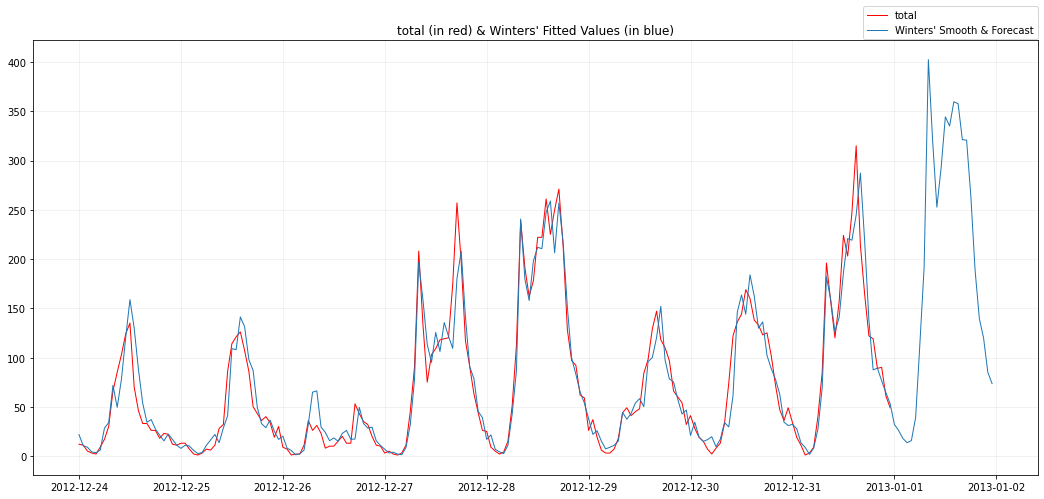

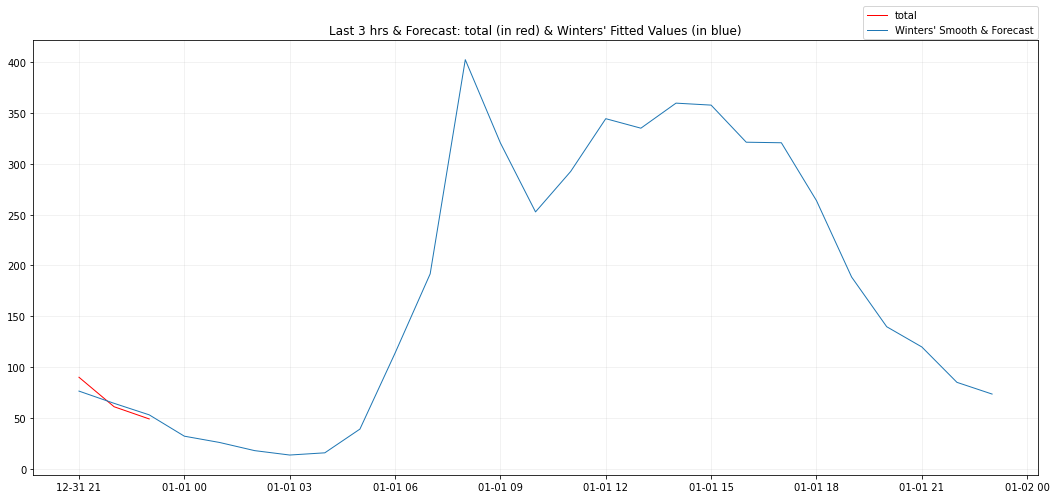

In [392]:
y = df['casual'][-besthrs:]

model = ExponentialSmoothing(y, freq=y.index.freqstr, trend='add', 
                             seasonal=bestmethod, seasonal_periods=period).fit()

print(2 * '\n', f'\033[1m') #bold on
print(" Winters' Forecast:", f'\033[0m', '\n') #bold off
print(model.summary())

fc = pd.concat([model.fittedvalues, model.forecast(period)])
fc.index.name = y.index.name
fc.name = y.name
lastfew = 3

print(f"\nWinters' Last {lastfew} Fitted & All {period} Forecast Values:\n")
print(fc.tail(period + lastfew))

plt.title(f"{y.name} (in red) & Winters' Fitted Values (in blue)")
plt.plot(y, color = 'red', label = y.name)
plt.plot(fc, label = "Winters' Smooth & Forecast")
plt.legend(bbox_to_anchor=(1.005, 1.089)) #place legend precisely for 18x8 plot
plt.grid(alpha=0.2)
plt.show()

plt.title(f"Last {lastfew} hrs & Forecast: {y.name} (in red) & Winters' Fitted Values (in blue)")
plt.plot(y.tail(lastfew), color = 'red', label = y.name)
plt.plot(fc.tail(lastfew + period), label = "Winters' Smooth & Forecast")
plt.legend(bbox_to_anchor=(1.005, 1.089)) #place legend precisely for 18x8 plot
plt.grid(alpha=0.2)
plt.show()